In [ ]:
#https://www.kaggle.com/datasets/uciml/horse-colic?select=horse.csv
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [ ]:
df=pd.read_csv("horse.csv")
#https://www.kaggle.com/datasets/uciml/horse-colic?select=horse.csv


In [ ]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [ ]:
df.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [ ]:
df.drop('hospital_number', inplace=True, axis=1)
df.drop('nasogastric_reflux_ph', inplace=True, axis=1)
df.drop('abdomo_protein', inplace=True, axis=1)
df.drop('abdomo_appearance', inplace=True, axis=1)
df.drop('cp_data', inplace=True, axis=1)

In [ ]:
df.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3
0,no,adult,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,...,NaN,decreased,distend_large,45.0,8.4,died,no,11300,0,0
1,yes,adult,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,...,NaN,absent,other,50.0,85.0,euthanized,no,2208,0,0
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,...,NaN,normal,normal,33.0,6.7,lived,no,0,0,0
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,...,less_1_liter,decreased,NaN,48.0,7.2,died,yes,2208,0,0
4,no,adult,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,...,NaN,NaN,NaN,74.0,7.4,died,no,4300,0,0


In [ ]:
df.nunique()

surgery                   2
age                       2
rectal_temp              40
pulse                    52
respiratory_rate         40
temp_of_extremities       4
peripheral_pulse          4
mucous_membrane           6
capillary_refill_time     3
pain                      5
peristalsis               4
abdominal_distention      4
nasogastric_tube          3
nasogastric_reflux        3
rectal_exam_feces         4
abdomen                   5
packed_cell_volume       50
total_protein            80
outcome                   3
surgical_lesion           2
lesion_1                 61
lesion_2                  6
lesion_3                  2
dtype: int64

In [ ]:
df.dtypes

surgery                   object
age                       object
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
dtype: object

In [ ]:
df.describe()

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion_1,lesion_2,lesion_3
count,239.000000,275.000000,241.000000,270.000000,266.000000,299.000000,299.000000,299.000000
mean,38.168619,72.000000,30.460581,46.307407,24.274436,3659.709030,90.528428,7.387960
std,0.733744,28.646219,17.666102,10.436743,27.364194,5408.472421,650.637139,127.749768
min,35.400000,30.000000,8.000000,23.000000,3.300000,0.000000,0.000000,0.000000
25%,37.800000,48.000000,18.000000,38.000000,6.500000,2111.500000,0.000000,0.000000
50%,38.200000,64.000000,25.000000,45.000000,7.500000,2322.000000,0.000000,0.000000
75%,38.500000,88.000000,36.000000,52.000000,56.750000,3209.000000,0.000000,0.000000
max,40.800000,184.000000,96.000000,75.000000,89.000000,41110.000000,7111.000000,2209.000000


In [ ]:
# df.info


In [ ]:
#replacing mean values in column with int or float
mean_to_replace={"rectal_temp": 38.17,"pulse": 72,"respiratory_rate": 30.46,"packed_cell_volume": 46.31,"total_protein": 24.27}
df=df.fillna(value=mean_to_replace)

In [ ]:
df.isnull().sum() #to check if nan gone

surgery                    0
age                        0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
rectal_exam_feces        102
abdomen                  118
packed_cell_volume         0
total_protein              0
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
dtype: int64

In [ ]:
df['surgery'].unique()


array(['no', 'yes'], dtype=object)

In [ ]:
df=df.replace({'surgery': {'no': 0, 'yes': 1}}) #replacing no as 0 and yes as 1 in surgery column
df=df.replace({'age': {'young': 0, 'adult': 1}}) #replacing no as 0 and yes as 1 in age column
df=df.replace({'temp_of_extremities': {'cold': 1, 'cool': 2 ,'normal': 3 ,'warm': 4 }})
df=df.replace({'peripheral_pulse': {'absent': 0, 'reduced': 1, 'normal': 2, 'increased':3}})
df=df.replace({'mucous_membrane': {'pale_cyanotic':0, 'pale_pink':1, 'dark_cyanotic':2, 'normal_pink':3,'bright_red':4, 'bright_pink':5}})
df=df.replace({'capillary_refill_time': {'more_3_sec': 2, 'less_3_sec': 0, '3':1}})
df=df.replace({'pain': {'extreme_pain':4, 'mild_pain':2, 'depressed':1,'severe_pain':3,'alert':0}})
df=df.replace({'peristalsis': {'absent':0, 'hypomotile':1,'hypermotile':3, 'normal':2}})
df=df.replace({'abdominal_distention': {'severe':3, 'slight':1, 'none':0,'moderate':2}})
df=df.replace({'nasogastric_tube': {'none':0, 'slight':1, 'significant':2}})
df=df.replace({'nasogastric_reflux': {'less_1_liter':1, 'none':0, 'more_1_liter':2}})
df=df.replace({'rectal_exam_feces': {'decreased':1, 'absent':0, 'normal':2,'increased':3}})
df=df.replace({'abdomen': {'distend_large':4, 'other':0, 'normal':3, 'firm':2, 'distend_small':1}})
df=df.replace({'outcome': {'died':0, 'euthanized':1, 'lived':2}})
df=df.replace({'surgical_lesion': {'no': 0, 'yes': 1}})



In [ ]:
df.dtypes

surgery                    int64
age                        int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities      float64
peripheral_pulse         float64
mucous_membrane          float64
capillary_refill_time    float64
pain                     float64
peristalsis              float64
abdominal_distention     float64
nasogastric_tube         float64
nasogastric_reflux       float64
rectal_exam_feces        float64
abdomen                  float64
packed_cell_volume       float64
total_protein            float64
outcome                    int64
surgical_lesion            int64
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
dtype: object

In [ ]:
df=df.dropna(how='any')

In [ ]:
#preprocessing done
X = df.drop('outcome',axis= 1)
y = df['outcome']
print(X)
print(y)

     surgery  age  rectal_temp  pulse  respiratory_rate  temp_of_extremities  \
5          0    1        38.17   72.0             30.46                  4.0   
6          1    1        37.90   48.0             16.00                  3.0   
8          0    1        38.17   80.0             36.00                  2.0   
10         1    1        38.10   66.0             12.00                  2.0   
12         1    1        37.20   42.0             12.00                  4.0   
..       ...  ...          ...    ...               ...                  ...   
284        1    1        38.50   66.0             24.00                  3.0   
290        1    1        38.90   80.0             44.00                  2.0   
295        0    1        37.20   72.0             24.00                  2.0   
296        1    1        37.50   72.0             30.00                  1.0   
297        1    1        36.50  100.0             24.00                  2.0   

     peripheral_pulse  mucous_membrane 

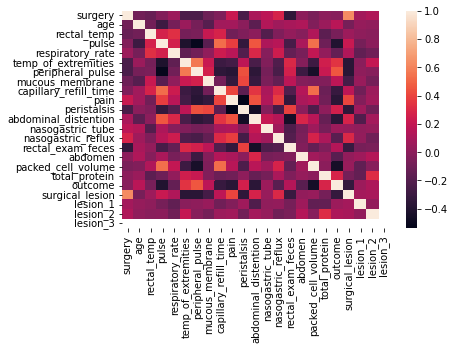

In [ ]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

## Linear regression model

In [ ]:
# creating a regression model
model = LinearRegression()


In [ ]:
# fitting the model
model.fit(X_train,y_train)


LinearRegression()

In [ ]:
# making predictions
predictions = model.predict(X_test)
x_axis=[x for x in range(1,len(predictions)+1) ]

In [ ]:
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score
# model evaluation
print(
'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
'mean_absolute_error : ', mean_absolute_error(y_test, predictions))
print('root_mean_error : ', math.sqrt(mean_squared_error(y_test, predictions)))

r2 = r2_score(y_test,predictions)
print("R-squared",r2)

mean_squared_error :  0.7808953768103482
mean_absolute_error :  0.6547181448671652
root_mean_error :  0.8836828485437228
R-squared 0.13176764025691534


In [ ]:
from sklearn.metrics import r2_score


0.13176764025691534


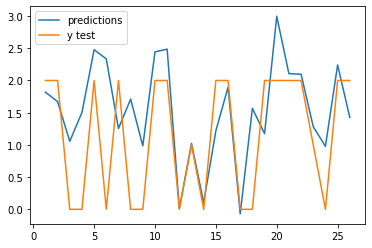

In [ ]:
import matplotlib.pyplot as plt

# plot lines
plt.plot(x_axis, predictions, label = "predictions")
plt.plot(x_axis, y_test, label = "y test")
plt.legend()
plt.show()

## Logistic regression model

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=100)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:

# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[ 5,  0,  5],
       [ 0,  0,  2],
       [ 0,  0, 14]])

Text(0.5, 257.44, 'Predicted label')

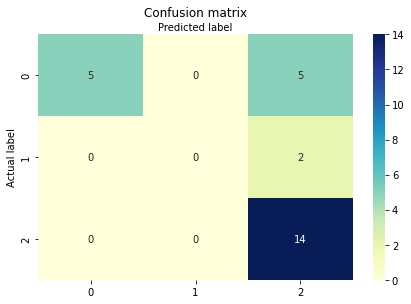

In [ ]:

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [ ]:
from sklearn.metrics import classification_report
target_names = ['0','1','2']
print(classification_report(y_test, y_pred, target_names=target_names))



              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.00      0.00      0.00         2
           2       0.67      1.00      0.80        14

    accuracy                           0.73        26
   macro avg       0.56      0.50      0.49        26
weighted avg       0.74      0.73      0.69        26



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
